<a href="https://colab.research.google.com/github/jkwakyi/food-sales-predictions/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Food Sales Predictions**
* Jared Ahenkora-Kwakyi
  * Data Artist

## **Mount Drive, Import Libraries, Create DataFrame, OSEMN**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import pandas

!pip install openpyxl==3.0.0
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn import set_config
set_config(display = 'diagram')

     |████████████████████████████████| 172 kB 13.0 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=cdc8957fed1093c6e0c1dca3ce89f801b4a6a19e40e3227a211fb982ca69403b
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.9
    Uninstalling openpyxl-3.0.9:
      Successfully uninstalled openpyxl-3.0.9


In [3]:
# import filename after mounting drive
filename = '/content/drive/MyDrive/Data/sales_predictions.csv'

### **OSEMN**

#### **Scrub**

In [54]:
df = pd.read_csv(filename)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Numerical**: 'Item_Weight', 'Item_Visibility', 'Item_MRP'

**Ordinal**: 'Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type'

**Nominal**: 'Item_Identifier', 'Item_Type', 'Outlet_Type'

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


* 11 Colums=ns
* 8523 Rows

* Dtype
  * 4 float64
  * 1 int64
  * 7 objects

In [7]:
# view values inside item fat content category
# prep for ordinal encoding

print(df[['Item_Fat_Content']].value_counts())
print(df[['Outlet_Type']].value_counts())
print(df[['Outlet_Location_Type']].value_counts())
print(df[['Outlet_Size']].value_counts())

Item_Fat_Content
Low Fat             5089
Regular             2889
LF                   316
reg                  117
low fat              112
dtype: int64
Outlet_Type      
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
dtype: int64
Outlet_Location_Type
Tier 3                  3350
Tier 2                  2785
Tier 1                  2388
dtype: int64
Outlet_Size
Medium         2793
Small          2388
High            932
dtype: int64


In [8]:
# ordinal encode categories

replace_fat = {'Low Fat': 0, 'low fat': 0, 'LF': 0,
                          'Regular': 1, 'reg': 1}
df['Item_Fat_Content'].replace(replace_fat, inplace = True)

replace_type = {'Grocery Store': 0, 'Supermarket Type1': 1,
                'Supermarket Type2' : 2, 'Supermarket Type3' : 3}
df['Outlet_Type'].replace(replace_type, inplace = True)

replace_location = {'Tier 1': 1, 'Tier 2' : 2, 'Tier 3' : 3}
df['Outlet_Location_Type'].replace(replace_location, inplace = True)

replace_size = {'Small' : 0, 'Medium' : 1, 'High' : 2}
df['Outlet_Size'].replace(replace_size, inplace = True)

In [9]:
df.value_counts().head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type    Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales
DRA12            11.600       0                 0.000000         Soft Drinks  141.9154  OUT035             2004                       0.0          2                     1            992.7078             1
FDV35            19.500       0                 0.128182         Breads       156.1314  OUT035             2004                       0.0          2                     1            2792.3652            1
FDV25            5.905        0                 0.045838         Canned       222.5456  OUT018             2009                       1.0          3                     2            3315.6840            1
                                                0.045723         Canned       222.1456  OUT049             1999                       1.0          1                     1            574

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   float64
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(4), object(3)
memory usage: 799.2+ KB


In [11]:
# train test split validation

y = df['Item_Outlet_Sales']

X = df.drop(columns = 'Item_Outlet_Sales')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [12]:
# instantiate column selector

cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

# instantiate imputers

freq_imputer = SimpleImputer(strategy = 'most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')

# instantiate scaler

scaler = StandardScaler()

# instantiate onehot encoder

ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

# instantiate pipeline

num_processor = make_pipeline(mean_imputer, scaler)
cat_processor = make_pipeline(freq_imputer, ohe)

# instantiate column transformer

# create transformer tuples
num_tuple = (num_processor, num_selector)
cat_tuple = (cat_processor, cat_selector)

# column transformer

transformer = make_column_transformer(num_tuple, cat_tuple,
                                      remainder = 'passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a9197fd90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a9197fdd0>)])

In [13]:
# fit transformer

X_training = transformer.fit(X_train)
X_training

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a9197fd90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a9197fdd0>)])

In [14]:
# get out the column transformer steps

transformer.named_transformers_

{'pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 'pipeline-2': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False))])}

In [15]:
# reference the pipeline that has the one hot encoder

cat_pipe = transformer.named_transformers_['pipeline-2']

In [16]:
# view feature names out from the one hot encoder

cat_pipe.named_steps['onehotencoder'].get_feature_names_out(cat_selector(X_train))

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049'],
      dtype=object)

In [17]:
# extract the feature names from one hot encoder

cat_feature_names = transformer.named_transformers_['pipeline-2']\
                      .named_steps['onehotencoder']\
                      .get_feature_names_out(cat_selector(X_train))
cat_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049'],
      dtype=object)

In [239]:
# get final column names which are num features & cat features

final_cols = num_selector(X_train) + list(cat_feature_names)


In [19]:
# transform data

# transform train and test

X_trainer = transformer.transform(X_train)
X_tester = transformer.transform(X_test)

# check for missing values and that data is scaled and onehot encoded

print(np.isnan(X_trainer).sum().sum(),
      'missing value in training data')
print(np.isnan(X_tester).sum().sum(),
      'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_trainer.dtype)
print('All data in X_test_processed are', X_tester.dtype)
print('\n')
print('shape of data is', X_trainer.shape)
print('\n')
X_trainer

0 missing value in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1584)




array([[ 0.81724868, -0.7403206 , -0.71277507, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.5563395 ,  1.35076614, -1.29105225, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13151196,  1.35076614,  1.81331864, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.11373638, -0.7403206 , -0.92052713, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.7403206 , -0.2277552 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.7403206 , -0.95867683, ...,  0.        ,
         1.        ,  0.        ]])

In [20]:
# change the x_train and x_test transformed columns to a dataframe

X_trained = pd.DataFrame(X_trainer, columns = final_cols)
X_tested = pd.DataFrame(X_tester, columns = final_cols)

# view first five rows of x_trained transformed dataframe

X_trained.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_DRA12,Item_Identifier_DRA24,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0.817249,-0.740321,-0.712775,1.828109,1.327849,0.407785,1.084948,0.983572,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.556340,1.350766,-1.291052,0.603369,1.327849,0.407785,1.084948,0.983572,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.131512,1.350766,1.813319,0.244541,0.136187,0.407785,-1.384777,-0.263600,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.169219,-0.740321,-1.004931,-0.952591,0.732018,-1.291630,-0.149914,-0.263600,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.528819,-0.740321,-0.965484,-0.336460,0.493686,0.000000,-0.149914,-0.263600,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
# view first five rows of x_tested transformed dataframe

X_tested.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_DRA12,Item_Identifier_DRA24,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,3.310089e-01,-0.740321,-0.776646,-0.998816,-1.293807,2.107200,1.084948,-0.263600,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.179892e+00,-0.740321,0.100317,-1.585194,-0.102145,-1.291630,-1.384777,-0.263600,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.784469e-01,1.350766,-0.482994,-1.595784,0.136187,0.407785,-1.384777,-0.263600,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.213344e-16,1.350766,-0.415440,0.506592,-1.532139,0.407785,1.084948,2.230744,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-6.426567e-01,1.350766,-1.047426,0.886725,0.732018,-1.291630,-0.149914,-0.263600,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### **Explore**

In [22]:
# create new dataframe containing pertinent information for prediction modeling

X_trained2 = X_trained.loc[:, ~X_trained.columns.str.startswith('Item_Identifier')]
X_trained3 = X_trained2.loc[:, ~X_trained2.columns.str.startswith('Outlet_Identifier_')]

In [23]:
X_tested2 = X_tested.loc[:, ~X_tested.columns.str.startswith('Item_Identifier')]
X_tested3 = X_tested2.loc[:, ~X_tested2.columns.str.startswith('Outlet_Identifier_')]

##### **Visualizations**

###### **Correlation Check**

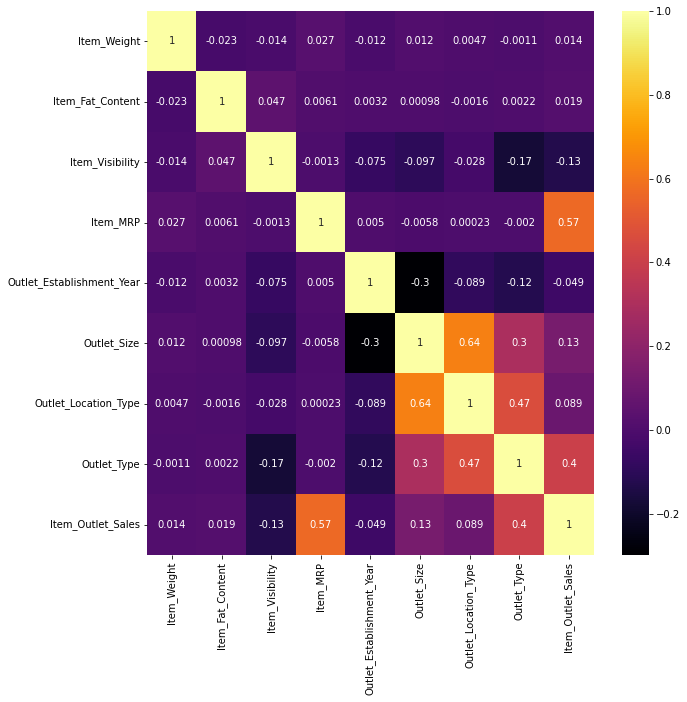

In [24]:
fig, ax = plt.subplots(figsize = (10, 10))

corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'inferno')

###### **Boxplot**

In [25]:
# replace outlet ID in original dataframe in order to create boxplot

df['Outlet_Identifier'].replace({'OUT010':'010', 'OUT013':'013','OUT017':'017',
                                 'OUT018':'018', 'OUT019':'019', 'OUT027':'027',
                                 'OUT035':'035', 'OUT045':'045', 'OUT046':'046',
                                 'OUT049':'049'}, inplace = True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,049,1999,1.0,1,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,018,2009,1.0,3,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,049,1999,1.0,1,1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,010,1998,NaN,3,0,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,013,1987,2.0,3,1,994.7052


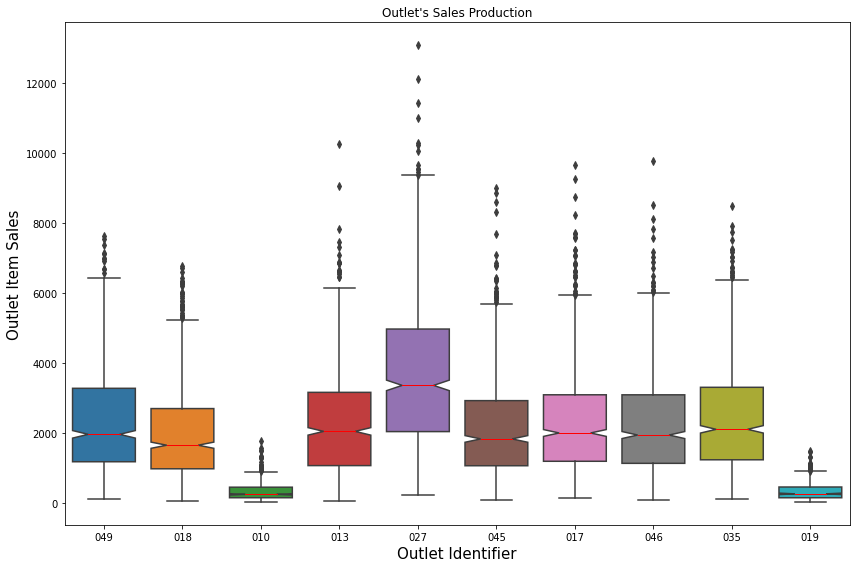

In [26]:
fig, axes = plt.subplots(figsize = (12, 8));
boxplots = sns.boxplot(data = df, y = 'Item_Outlet_Sales', x = 'Outlet_Identifier',
            notch = True,
            medianprops = dict(linestyle = '-', linewidth = 1, color = 'red'));
plt.xlabel('Outlet Identifier', fontsize = 15);
plt.ylabel('Outlet Item Sales', fontsize = 15);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);
plt.title("Outlet's Sales Production");
plt.tight_layout()

###### **Histogram**

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,049,1999,1.0,1,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,018,2009,1.0,3,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,049,1999,1.0,1,1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,010,1998,NaN,3,0,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,013,1987,2.0,3,1,994.7052


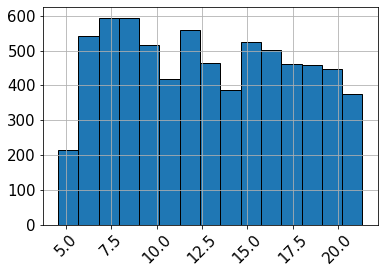

In [28]:
df['Item_Weight'].hist(bins = 15, edgecolor = 'black');
plt.xticks(rotation = 45, fontsize = 15);
plt.yticks(fontsize = 15);

###### **Scatterplot**

In [29]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,049,1999,1.0,1,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,018,2009,1.0,3,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,049,1999,1.0,1,1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,010,1998,NaN,3,0,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,013,1987,2.0,3,1,994.7052


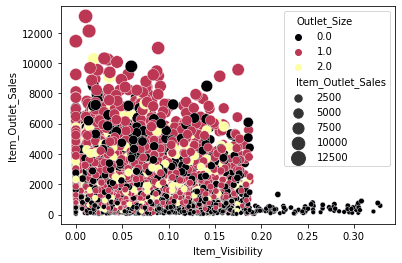

In [30]:
sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Outlet_Sales',
                hue = 'Outlet_Size', palette = 'inferno',
                size = 'Item_Outlet_Sales', sizes = (20,200))


In [31]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

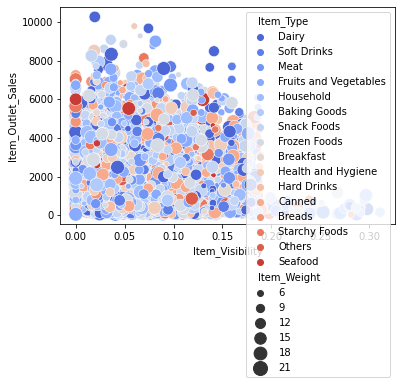

In [32]:
sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Outlet_Sales',
                hue = 'Item_Type', palette = 'coolwarm',
                size = 'Item_Weight', sizes = (20,200));

###### **SwarmPlot**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 88.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 88.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 94.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.9% of the points cannot be placed; y

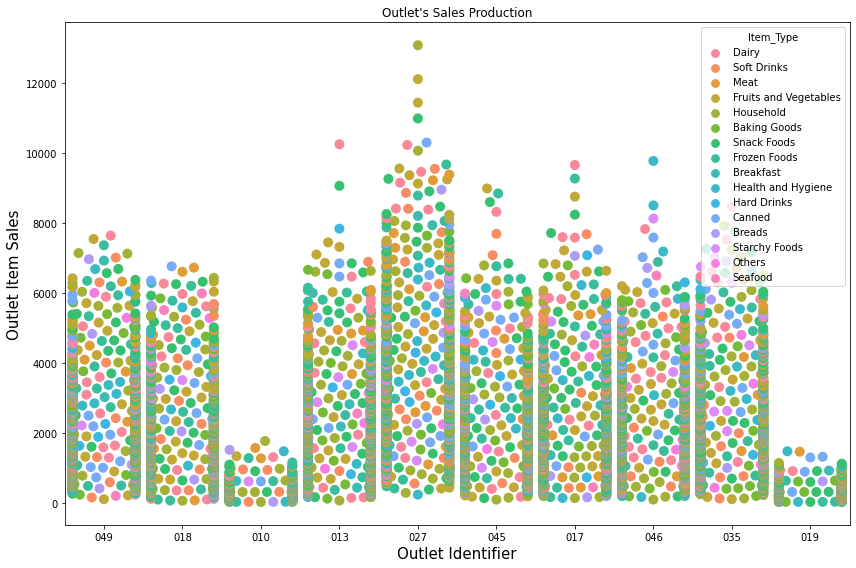

In [33]:
fig, axes = plt.subplots(figsize = (12, 8));
swarm = sns.swarmplot(data = df, y = 'Item_Outlet_Sales', x = 'Outlet_Identifier',
            hue = 'Item_Type', size = 10);
plt.xlabel('Outlet Identifier', fontsize = 15);
plt.ylabel('Outlet Item Sales', fontsize = 15);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);
plt.title("Outlet's Sales Production");
plt.tight_layout();

###### **Bar**

In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,049,1999,1.0,1,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,018,2009,1.0,3,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,049,1999,1.0,1,1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,010,1998,NaN,3,0,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,013,1987,2.0,3,1,994.7052


In [35]:
total_sales_by_store = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
total_sales_by_store.round(2)

Outlet_Identifier
010     188340.17
013    2142663.58
017    2167465.29
018    1851822.83
019     179694.09
027    3453926.05
035    2268122.94
045    2036725.48
046    2118395.17
049    2183969.81
Name: Item_Outlet_Sales, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


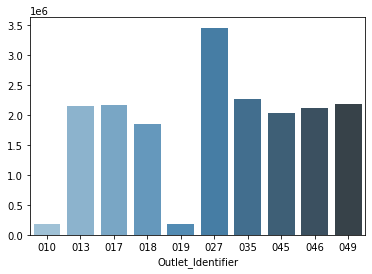

In [36]:
sns.barplot(total_sales_by_store.index, total_sales_by_store.values, palette = 'Blues_d');

###### **Item Sales Focus**

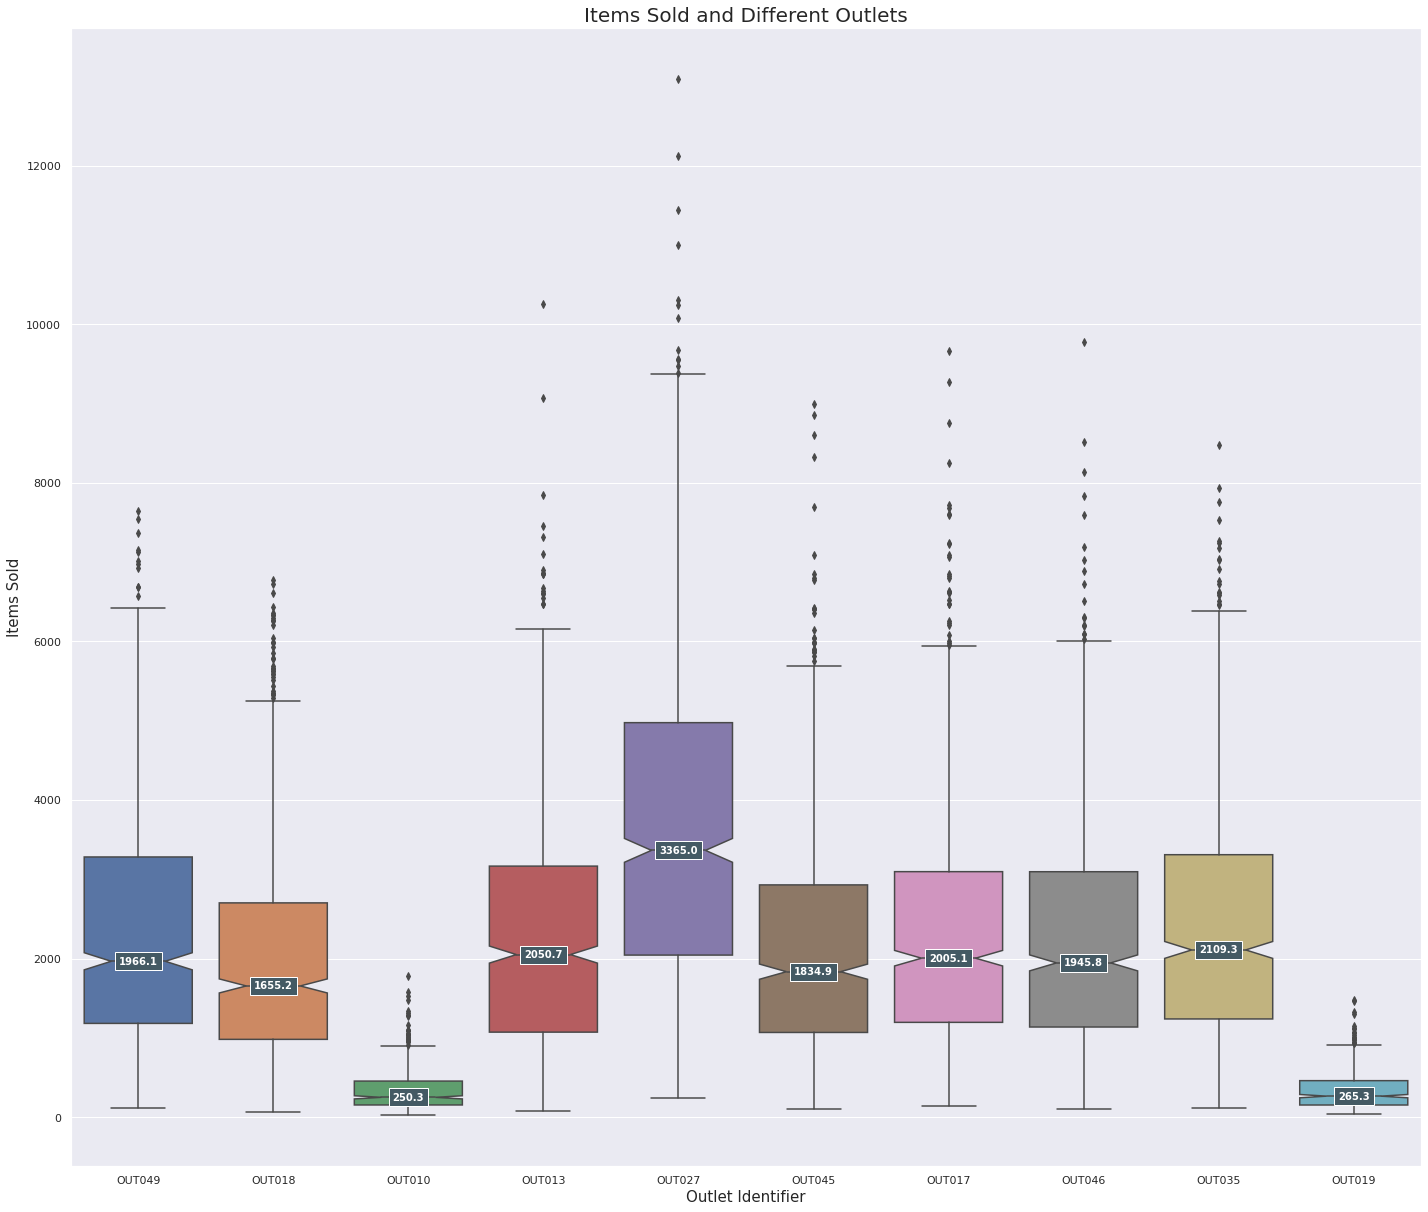

In [192]:
from seaborn.categorical import boxplot
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 17))
sns.set(style = 'darkgrid')

boxplot = sns.boxplot(data = df, x = 'Outlet_Identifier', y = 'Item_Outlet_Sales',
            notch = True,
            );

ax = boxplot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for x in categories:
  y = round(lines[4+x*6].get_ydata()[0],1)

  ax.text(x,
          y,
          f'{y}',
          ha = 'center',
          va = 'center',
          fontweight = 'bold',
          size = 10,
          color = 'white',
          bbox = dict(facecolor = '#445A64'))

boxplot.set_xlabel('Outlet Identifier', fontsize = 15)
boxplot.set_ylabel('Items Sold', fontsize = 15)
boxplot.set_title('Items Sold and Different Outlets', fontsize = 20)
boxplot.figure.tight_layout()

In [193]:
figure = boxplot.get_figure()  
figure.savefig('Items Sold and Different Outlets')

* Why are outlet's 10, and 19 underperforming?
* What is causing Outlet 27 to have so much success
* With average sales ranging from 250 to 3300, what is the company's status quo?
* Are there certain items that are selling better in certain regions or particualr stores?

* mean label code assistance from: [Stackoverflow](https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value)

In [70]:
size_sales = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()
outlet_type_sales = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()

In [214]:
bins = [30, 60, 90, 120, 150, 180, 210, 240, 270]
mrp = pd.cut(df['Item_MRP'], bins)
mrp_sales = df.groupby(mrp)['Item_Outlet_Sales'].sum()

In [185]:
visbins = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
vis = pd.cut(df['Item_Visibility'], visbins)
vis_sales = df.groupby(vis)['Item_Outlet_Sales'].mean()

vis_sales

Item_Visibility
(0.0, 0.05]    2299.537585
(0.05, 0.1]    2279.229840
(0.1, 0.15]    2020.919905
(0.15, 0.2]    1725.698117
(0.2, 0.25]     292.775015
(0.25, 0.3]     390.251702
(0.3, 0.35]     437.319633
Name: Item_Outlet_Sales, dtype: float64

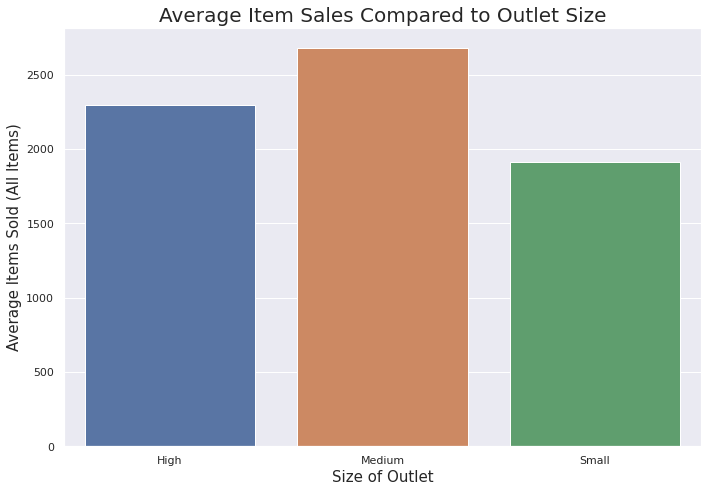

In [203]:
from seaborn.categorical import boxplot
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))
sns.set(style = 'darkgrid')

barplot = sns.barplot(data = df, x = size_sales.index, y = size_sales.values);


barplot.set_xlabel('Size of Outlet', fontsize = 15)
barplot.set_ylabel('Average Items Sold (All Items)', fontsize = 15)
barplot.set_title('Average Item Sales Compared to Outlet Size', fontsize = 20)
barplot.figure.tight_layout()

In [205]:
figure = barplot.get_figure()  
figure.savefig('Average Item Sales Compared to Outlet Size')

* Medium sized outlets produce the highest sales on average
  * outlet 27 is part of the medium category of outlets
    * outlet 27 is also the oldest outlet
      * the longjevity of outlet 27 probably plays a role as to why it produces the most sales. customers have built a rappor with it

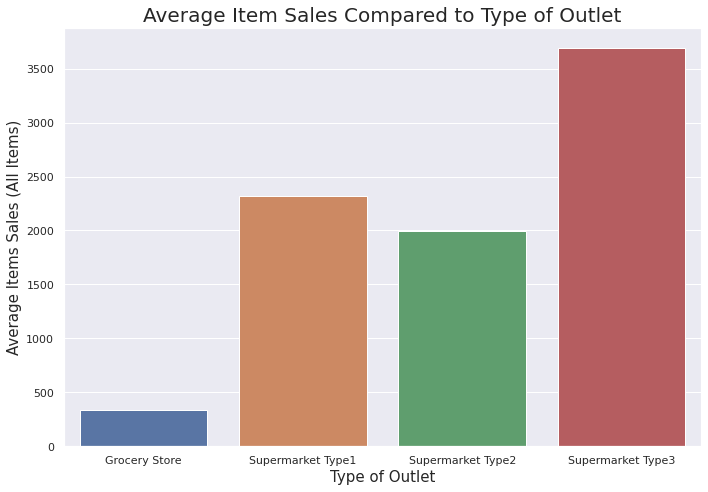

In [206]:
from seaborn.categorical import boxplot
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))
sns.set(style = 'darkgrid')

typebarplot = sns.barplot(data = df, x = outlet_type_sales.index, y = outlet_type_sales.values);


typebarplot.set_xlabel('Type of Outlet', fontsize = 15)
typebarplot.set_ylabel('Average Items Sales (All Items)', fontsize = 15)
typebarplot.set_title('Average Item Sales Compared to Type of Outlet', fontsize = 20)
typebarplot.figure.tight_layout()

In [207]:
figure = typebarplot.get_figure()  
figure.savefig('type bar')

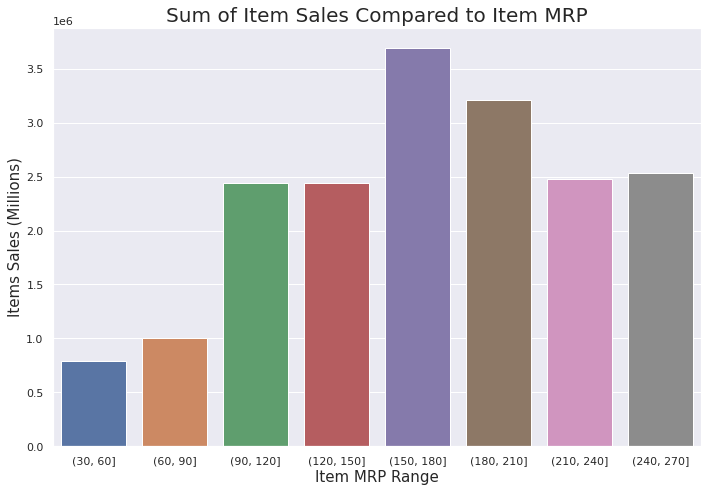

In [221]:
from seaborn.categorical import boxplot
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))
sns.set(style = 'darkgrid')

mrpbarplot = sns.barplot(data = df, x = mrp_sales.index, y = mrp_sales.values);


mrpbarplot.set_xlabel('Item MRP Range', fontsize = 15)
mrpbarplot.set_ylabel('Items Sales (Millions)', fontsize = 15)
mrpbarplot.set_title('Sum of Item Sales Compared to Item MRP', fontsize = 20)
mrpbarplot.figure.tight_layout()

In [222]:
figure = mrpbarplot.get_figure()  
figure.savefig('mrp bar')

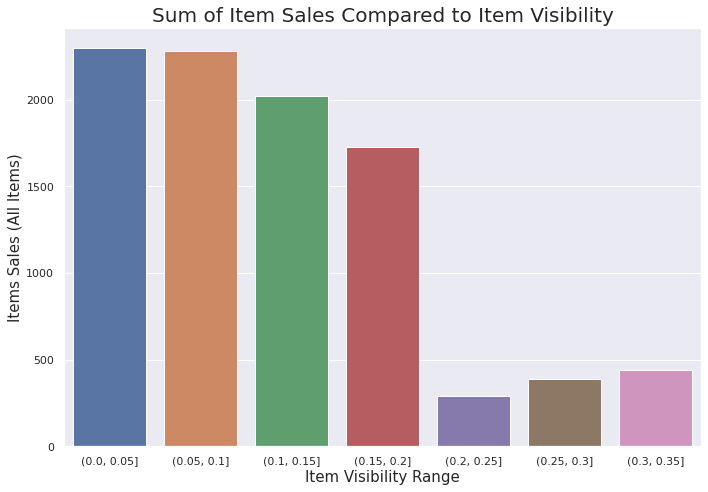

In [210]:
from seaborn.categorical import boxplot
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))
sns.set(style = 'darkgrid')

visbarplot = sns.barplot(data = df, x = vis_sales.index, y = vis_sales.values);


visbarplot.set_xlabel('Item Visibility Range', fontsize = 15)
visbarplot.set_ylabel('Items Sales (All Items)', fontsize = 15)
visbarplot.set_title('Sum of Item Sales Compared to Item Visibility', fontsize = 20)
visbarplot.figure.tight_layout()

In [211]:
figure = visbarplot.get_figure()  
figure.savefig('vis bar')

#### **Model**

I was getting null values for some reason so I decided to simply drop all of the null rows. It will have an affect on my modeling but the general understanding should still be attainable.

**Features (X) to Include**: 'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Type'

##### **Linear Regression Modeling**

In [41]:
Xtrain = X_trained3[['Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Type']]
Xtest = X_tested3[['Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Type']]

In [42]:
# instantiate linear regression tree model

reg = LinearRegression()

# fit linear regression tree to train data

reg.fit(Xtrain, y_train)

# evaluate linear regression tree

reg_train_score = reg.score(Xtrain, y_train)
print(reg_train_score)
reg_test_score = reg.score(Xtest, y_test)
print(reg_test_score)

0.4868575211634103
0.4885004054126194


train and test r2 scores are fairly similar but we see a high bias. I am sure if I continue to tune my model, I can find a better result.

In [43]:
# obtain the predictions of the train set

reg_train_preds = reg.predict(Xtrain)

# obtain the predictions of the test set

reg_test_preds = reg.predict(Xtest)

# Evaluate your model performance using RMSE on the training set and on the test set.

reg_rmse_train = np.sqrt(mean_squared_error(y_train, reg_train_preds))
reg_rmse_test = np.sqrt(mean_squared_error(y_test, reg_test_preds))

print(reg_rmse_train)
print(reg_rmse_test)

1232.3239980734954
1187.9460274730054


In [44]:
type(y_train)

pandas.core.series.Series

In [45]:
seriestrain = Xtrain.squeeze(axis = 0)
seriestest = Xtest.squeeze()

type(seriestrain)

pandas.core.frame.DataFrame

##### **Regression Tree Model**

In [46]:
# instantiate decision tree model

dec_tree = DecisionTreeRegressor(random_state = 42)

# fit decision tree on training data

dec_tree.fit(Xtrain, y_train)

# evaluate regression tree model

tree_train_score = dec_tree.score(Xtrain, y_train)
tree_test_score = dec_tree.score(Xtest, y_test)
print(tree_train_score)
print(tree_test_score)

0.9999536935235739
0.1929164256370367


We see an extremely high variance with a gross overfit. Model tuning will be required.

In [47]:
# obtain predictions for train and test sets

tree_train_preds = dec_tree.predict(Xtrain)
tree_test_preds = dec_tree.predict(Xtest)

# Evaluate your model performance using RMSE on the training set and on the test set.

tree_rmse_train = np.sqrt(mean_squared_error(y_train, tree_train_preds))
tree_rmse_test = np.sqrt(mean_squared_error(y_test, tree_test_preds))

print(tree_rmse_train)
print(tree_rmse_test)

11.706492464257586
1492.2215824163745


In [48]:
# determine max depth of default tree

dec_tree.get_depth()

38

Text(0, 0.5, 'R2')

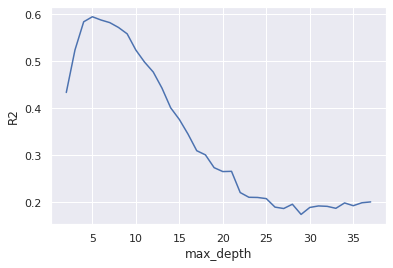

In [49]:
# find optimal depth for highest r2

max_depth_range = list(range(2, 38))

# list to store the score for each value of max_depth

r2 = []

# function to cycle through max depths

for depth in max_depth_range:
  dec_tree = DecisionTreeRegressor(max_depth = depth,
                                   random_state = 42)
  dec_tree.fit(Xtrain, y_train)
  score = dec_tree.score(Xtest, y_test)
  r2.append(score)

# visualize optimal max depth with highest r2

plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2')

From the image above, it looks like the best score for the model is when the parameter max_depth is 5.

In [50]:
# utilize optimal max depth and remake regression tree

dec_tree_5 = DecisionTreeRegressor(max_depth = 5,
                                   random_state = 42)
dec_tree_5.fit(Xtrain, y_train)
train_5_score = dec_tree_5.score(Xtrain, y_train)
test_5_score = dec_tree_5.score(Xtest, y_test)
print(train_5_score)
print(test_5_score)

0.6039045881882898
0.5947374340762479


Tuned my model to a **max depth of 5** to get a less under-fit model which I was able to find. I will need to tune my model a little more but **Regression tree model seems to be the best option**. The r2 indicates a positive correlation without too much overfitting which is what we were looking for with a 60%/59% accuracy split. The accuracy of the predictions with this model show that utilizing Outlet size, outlet type, item visibility, and item MRP will help predict outlet item sales. 

In [51]:
# obtain new predictions for train and test sets

tree5_train_preds = dec_tree_5.predict(Xtrain)
tree5_test_preds = dec_tree_5.predict(Xtest)

# Evaluate your new model performance using RMSE on the training set 
#and on the test set.

tree5_rmse_train = np.sqrt(mean_squared_error(y_train, tree5_train_preds))
tree5_rmse_test = np.sqrt(mean_squared_error(y_test, tree5_test_preds))

print(tree5_rmse_train)
print(tree5_rmse_test)

1082.6942440148844
1057.4073079858485


### **Conclusion**

Outlet # 27 is the main focus. What do they have thats outpacing their competition? Lets find out.

In [52]:
X_trained.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_DRA12,Item_Identifier_DRA24,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0.817249,-0.740321,-0.712775,1.828109,1.327849,0.407785,1.084948,0.983572,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.556340,1.350766,-1.291052,0.603369,1.327849,0.407785,1.084948,0.983572,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.131512,1.350766,1.813319,0.244541,0.136187,0.407785,-1.384777,-0.263600,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.169219,-0.740321,-1.004931,-0.952591,0.732018,-1.291630,-0.149914,-0.263600,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.528819,-0.740321,-0.965484,-0.336460,0.493686,0.000000,-0.149914,-0.263600,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [224]:
df.groupby('Outlet_Identifier')['Item_Visibility'].mean().round(2)

Outlet_Identifier
OUT010    0.10
OUT013    0.06
OUT017    0.06
OUT018    0.06
OUT019    0.11
OUT027    0.06
OUT035    0.06
OUT045    0.06
OUT046    0.06
OUT049    0.06
Name: Item_Visibility, dtype: float64

**Outlet 27** -
* Supermarket type 3 outlet type
* Average Item visibility
* third lowest MRP
* Medium Outlet